# CSMODEL Project 2
## S12 - Group 7
### Members
* BASCO, AVIAN LANCE MEDINA
* NARVAEZ, JOSE WILFREDO SALAPANTAN
* WONG, MICHAEL EDMUND VIRAY

# Dataset Representation

In [1]:
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('Dataset7.csv', sep='\n', header=None)
series = []

for i in range(len(df)):
    series.append(np.array([int(v) for v in df.iloc[i][0].split(',')]))

series = pd.Series(series)
series_min = np.array(list(map(min, series))).min()
series_max = np.array(list(map(max, series))).max()
print('Min Value', series_min)
print('Max Value', series_max)
print('Min Value Count', np.array(list(map(len, series))).min())
print('Max Value Count', np.array(list(map(len, series))).max())
series

Min Value 0
Max Value 19
Min Value Count 1
Max Value Count 8


0              [7, 9, 10, 11]
1       [5, 8, 9, 13, 15, 16]
2                        [13]
3                  [5, 8, 15]
4       [1, 5, 8, 14, 16, 17]
                ...          
1195           [1, 2, 12, 15]
1196              [4, 12, 15]
1197       [0, 1, 10, 18, 19]
1198               [5, 9, 14]
1199              [0, 12, 15]
Length: 1200, dtype: object

In [3]:
columns = [i for i in range(series_min, series_max + 1)]
values = []

for item in series:
    row = [0 for i in range(series_min, series_max + 1)]
    values.append(row)
    
    for num in item:
        row[num] += 1
        
df_processed = pd.DataFrame(data=values, columns=columns)
df_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1196,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1197,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1198,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


The dataset `Dataset7.csv` is a series of comma-separated numbers of varying quantity. The format is newline-separated, where each line represents a single array of comma-separated numbers. There is a total of 1200 observations available in the dataset, and only 1 variable that holds comma-separated numbers of varying quantity. The dataset can be presumed as a association rule mining dataset.

The numbers contained are whole numbers, where some can be found in multiple observations. The lowest value that can be observed is 0, and the highest value is 19. The highest quantity of numbers in a single observation is 8, whereas the lowest quantity is 1.

# Exploratory Data Analysis

## Number Frequency
How often does a number appear on each observation?

The most frequently observed number is 12, appearing 488 times out of 1200 observations, while the least number is 7, appearing 146 times out of 1200 observations. The difference from the most frequent (column 12) and the least frequent (column 7) is 342 out of 1200 observations.

Most Frequent 12 488
Least Frequent 7 146
Most-to-Least Difference 342
0 290
1 404
2 312
3 181
4 165
5 216
6 171
7 146
8 199
9 177
10 174
11 260
12 488
13 300
14 182
15 342
16 186
17 207
18 156
19 457


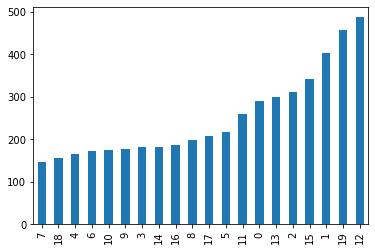

In [4]:
df_processed_sum = df_processed.sum()
print('Most Frequent', df_processed_sum.idxmax(), df_processed_sum.max())
print('Least Frequent', df_processed_sum.idxmin(), df_processed_sum.min())
print('Most-to-Least Difference', df_processed_sum.max() - df_processed_sum.min())
df_processed_sum.sort_values().plot(kind='bar')

for i in range(len(df_processed_sum)):
    print(i, df_processed_sum[i])

## Number Pairing Frequency

What numbers are oftenly seen with another number?

This can also be referred to as itemset support value for item pairs.

The amount of times a pair of 2 different numbers are found in the same observation.
The intersection point on the table corresponds to the `Number Frequency` value of that number (example; row 7, column 7 is an intersection point containing the value of 146.)

The table below shows the frequency of each number when paired with another number.

In [5]:
result=[]

for column in df_processed.columns:
    result.append(df_processed[df_processed[column] > 0].sum())

df_association = pd.DataFrame(
    data=result,
    columns=df_processed.columns
)
df_association

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,290,58,36,49,34,47,39,37,43,34,54,52,45,58,49,42,48,45,36,179
1,58,404,170,57,43,38,43,42,59,39,60,137,190,139,47,59,46,69,46,175
2,36,170,312,62,49,56,47,41,48,49,52,47,188,53,45,69,51,57,43,180
3,49,57,62,181,32,52,33,28,43,31,38,38,65,47,21,40,41,36,40,80
4,34,43,49,32,165,38,28,27,42,26,30,24,68,25,40,62,27,47,33,55
5,47,38,56,52,38,216,41,40,40,48,37,41,77,52,43,70,53,65,24,76
6,39,43,47,33,28,41,171,37,45,32,40,29,56,39,42,47,28,56,32,44
7,37,42,41,28,27,40,37,146,35,29,26,26,50,30,19,39,19,31,29,51
8,43,59,48,43,42,40,45,35,199,37,35,43,74,50,46,57,33,56,36,81
9,34,39,49,31,26,48,32,29,37,177,35,43,70,47,44,66,19,35,38,49


The graph below is a correlation matrix version of the table above.

The yellow diagonal line that stretches across the entire plot is the intersection point, corresponding to the `Number Frequency`. The bright green boxes are the frequent pairs to the current row. For example, the first item (in column 0, row 0) is found to be frequently paired with the 19th item (in column 19, row 0), shown as a green box at the far right, brighter than the rest in the row.

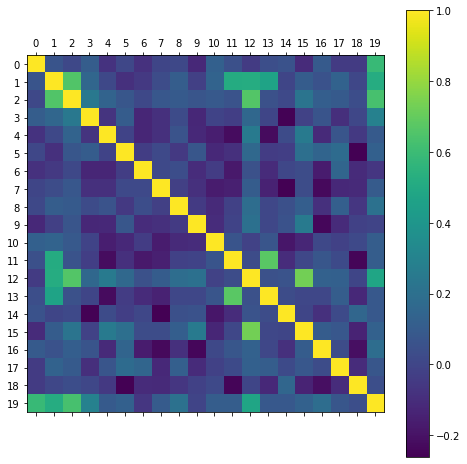

In [33]:
f = plt.figure(figsize=(8, 8))
plt.matshow(df_association.corr(), fignum=f.number)
plt.xticks(range(df_association.select_dtypes(['number']).shape[1]), df_association.select_dtypes(['number']).columns)
plt.yticks(range(df_association.select_dtypes(['number']).shape[1]), df_association.select_dtypes(['number']).columns)
plt.colorbar()

# Data Mining

In [13]:
from rule_miner import RuleMiner

Using support threshold of 10 and confidence threshold of 0.6, the rule miner is used to extrapolate relevant data from the data frame.

In [15]:
rule_miner = RuleMiner(10, 0.6)

By extracting the support values for the given itemsets, it can be noted that it is inline with the `Number Pairing Frequency`.

In [35]:
def print_support(v):
    print(v, '=', rule_miner.get_support(df_processed, v))

print_support([0])
print_support([0, 1])
print_support([10, 13])
print_support([0, 1, 2])

[0] = 290
[0, 1] = 58
[10, 13] = 51
[0, 1, 2] = 14


The frequent itemsets based on the given thresholds can be seen below.

In [20]:
frequent_itemsets = rule_miner.get_frequent_itemsets(df_processed)

for v in frequent_itemsets:
    print(v)

[1, 2, 3, 12, 19]
[1, 2, 4, 12, 19]
[1, 2, 5, 12, 19]
[1, 2, 8, 12, 19]
[1, 2, 10, 12, 19]
[1, 2, 12, 15, 19]
[1, 2, 12, 16, 19]
[1, 2, 12, 17, 19]


All possible rules that can be derived from the frequent itemsets can be seen below.

In [25]:
for itemset in frequent_itemsets:
    rules0 = rule_miner.get_rules(itemset)
    
    for rule in rules0:
        print(rule[0], '->', rule[1])

[1, 2, 3, 12] -> [19]
[19] -> [1, 2, 3, 12]
[1, 2, 3, 19] -> [12]
[12] -> [1, 2, 3, 19]
[1, 2, 12, 19] -> [3]
[3] -> [1, 2, 12, 19]
[1, 3, 12, 19] -> [2]
[2] -> [1, 3, 12, 19]
[2, 3, 12, 19] -> [1]
[1] -> [2, 3, 12, 19]
[1, 2, 4, 12] -> [19]
[19] -> [1, 2, 4, 12]
[1, 2, 4, 19] -> [12]
[12] -> [1, 2, 4, 19]
[1, 2, 12, 19] -> [4]
[4] -> [1, 2, 12, 19]
[1, 4, 12, 19] -> [2]
[2] -> [1, 4, 12, 19]
[2, 4, 12, 19] -> [1]
[1] -> [2, 4, 12, 19]
[1, 2, 5, 12] -> [19]
[19] -> [1, 2, 5, 12]
[1, 2, 5, 19] -> [12]
[12] -> [1, 2, 5, 19]
[1, 2, 12, 19] -> [5]
[5] -> [1, 2, 12, 19]
[1, 5, 12, 19] -> [2]
[2] -> [1, 5, 12, 19]
[2, 5, 12, 19] -> [1]
[1] -> [2, 5, 12, 19]
[1, 2, 8, 12] -> [19]
[19] -> [1, 2, 8, 12]
[1, 2, 8, 19] -> [12]
[12] -> [1, 2, 8, 19]
[1, 2, 12, 19] -> [8]
[8] -> [1, 2, 12, 19]
[1, 8, 12, 19] -> [2]
[2] -> [1, 8, 12, 19]
[2, 8, 12, 19] -> [1]
[1] -> [2, 8, 12, 19]
[1, 2, 10, 12] -> [19]
[19] -> [1, 2, 10, 12]
[1, 2, 10, 19] -> [12]
[12] -> [1, 2, 10, 19]
[1, 2, 12, 19] -> [10]
[10] 

By dividing the right-hand of the rule by the left-hand, the confidence value of the rule can be derived. The threshold previously declared will be used to assess for association rules.

In [23]:
def print_confidence(v):
    print(v[0], '->', v[1], '=', '{:.2f}'.format(rule_miner.get_confidence(df_processed, v)))

print_confidence([[1, 2], [3]])
print_confidence([[4, 5], [6]])
print_confidence([[7, 8], [9]])
print_confidence([[10, 11], [12]])

[1, 2] -> [3] = 0.15
[4, 5] -> [6] = 0.13
[7, 8] -> [9] = 0.06
[10, 11] -> [12] = 0.22


All the rules within the confidence threshold can be seen below.

In [21]:
rules = rule_miner.get_association_rules(df_processed)

for rule in rules:
    print(rule[0], '->', rule[1])

[1, 2, 3, 12] -> [19]
[1, 2, 3, 19] -> [12]
[1, 3, 12, 19] -> [2]
[2, 3, 12, 19] -> [1]
[1, 2, 4, 12] -> [19]
[1, 2, 4, 19] -> [12]
[1, 4, 12, 19] -> [2]
[2, 4, 12, 19] -> [1]
[1, 2, 5, 12] -> [19]
[1, 2, 5, 19] -> [12]
[1, 5, 12, 19] -> [2]
[2, 5, 12, 19] -> [1]
[1, 2, 8, 12] -> [19]
[1, 2, 8, 19] -> [12]
[1, 8, 12, 19] -> [2]
[2, 8, 12, 19] -> [1]
[1, 2, 10, 12] -> [19]
[1, 2, 10, 19] -> [12]
[1, 10, 12, 19] -> [2]
[2, 10, 12, 19] -> [1]
[1, 2, 12, 15] -> [19]
[1, 2, 15, 19] -> [12]
[1, 12, 15, 19] -> [2]
[2, 12, 15, 19] -> [1]
[1, 2, 12, 16] -> [19]
[1, 2, 16, 19] -> [12]
[1, 12, 16, 19] -> [2]
[2, 12, 16, 19] -> [1]
[1, 2, 12, 17] -> [19]
[1, 2, 17, 19] -> [12]
[1, 12, 17, 19] -> [2]
[2, 12, 17, 19] -> [1]


# Insights and Conclusions

## Support Value Extrapolation

For itemsets of only consisting of pairs, the `Number Pairing Frequency` can be used to perform a visual representation of the support values as the process is effectively the same. A person may effectively identify simple association rules without committing to additional techniques. The downside, however, is that the visualization is normalized which may be relevant in certain cases such as the volume of items involved.

## Frequent Itemsets

In order to identify the popular itemsets based on the given threshold, this allows for strategies that may improve overall performance for selecting the series of items related, such as combining the items together or providing a reward for purchasing said products. This may also be used to determine the least selected itemsets and may improve upon if necessary.

## Possible Rule Combinations

As the possible rules is exponentially increasing per items available, only the frequent itemsets are used with the thresholds provided as the main point in mind. This significantly reduces the amount of work needed to perform the task, considering the number of rules that can be made is exponential. While that is the case, this will help expose the association between the items according to the dataset.

## Confidence Value

By using the support values allows to determine the confidence value of a rule. This implies relativity to the commonality of selecting another item based on the current itemset at hand. With the threshold defined, this allows filtering the more probable rules in the set of rules provided.

## Association Rules

With the rules filtered based on their confidence values to the threshold, this identifies some popular pattern on item selection. As these are identified, one may improve upon it if need be to support the itemsets, increasing the frequency.

## Conclusion

With the visual representation from the `Number Frequency` and `Number Pairing Frequency`, it has provided clarity to the dataset, exposing the support values easily such that a person may identify which is relevant to them based on the shape of the graph. It can be noted that the graph is normalized based on the highest value, it is not biased to any thresholds which may be disconcerting when uninformed to the size of the dataset. With the number table provided by the `Number Pairing Frequency`, this alleviates this problem entirely.